<a href="https://colab.research.google.com/github/zachary013/Lab3-DL/blob/main/Atelier3_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Part1**

In [1]:
import torch
print(f"GPU available: {torch.cuda.is_available()}")
print(f"GPU device name: {torch.cuda.get_device_name(0) if torch.cuda.is_available() else 'None'}")

!pip install scrapy beautifulsoup4 pyarabic farasapy transformers

GPU available: True
GPU device name: Tesla T4
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.4/126.4 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 29.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.8/259.8 kB 21.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.3/106.3 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 kB 3.8 MB/s eta 0:00:00


In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
import random

# List of Arabic news websites
websites = [
    "https://www.aljazeera.net/news/politics",
    "https://www.bbc.com/arabic",
    "https://arabic.cnn.com/",
    # Add more sites as needed
]

collected_texts = []

# Scrape text from each website
for website in websites[:2]:  # Limiting to first 2 for demonstration
    try:
        response = requests.get(website, timeout=10)
        soup = BeautifulSoup(response.content, "html.parser")

        # Extract paragraphs (adjust selectors based on website structure)
        paragraphs = soup.find_all("p")

        for p in paragraphs:
            text = p.get_text().strip()
            # Filter for Arabic text with decent length
            if len(text) > 100 and re.search(r'[\u0600-\u06FF]', text):
                collected_texts.append(text)
    except Exception as e:
        print(f"Error scraping {website}: {e}")

# Create a dataset with assigned scores (simulated for this example)
data = []
for text in collected_texts[:20]:  # Limiting to first 20 texts
    score = round(random.uniform(0, 10), 1)
    data.append({"text": text, "score": score})

df = pd.DataFrame(data)
print(f"Collected {len(df)} texts")
df.head()

df.to_csv('arabic_texts.csv', index=False)

Collected 20 texts


In [3]:
# NLP Preprocessing Pipeline
import re
import numpy as np
from pyarabic import araby
from farasa.stemmer import FarasaStemmer


stemmer = FarasaStemmer()

def preprocess_arabic_text(text):
    # Remove diacritics
    text = araby.strip_tashkeel(text)

    # Remove non-Arabic characters and extra spaces
    text = re.sub(r'[^\u0600-\u06FF\s]', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()

    # Tokenization
    tokens = araby.tokenize(text)

    # Stemming
    stems = [stemmer.stem(token) for token in tokens]

    # Remove Arabic stop words (you might need a comprehensive list)
    arabic_stop_words = set(['من', 'إلى', 'في', 'على', 'عن', 'مع', 'هذا', 'هذه', 'ذلك', 'تلك'])
    filtered_stems = [token for token in stems if token not in arabic_stop_words]

    return " ".join(filtered_stems)

# Apply preprocessing to all texts
df['processed_text'] = df['text'].apply(preprocess_arabic_text)
df.head()

/usr/local/lib/python3.11/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'farasa-api.qcri.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


100%|██████████| 241M/241M [03:40<00:00, 1.09MiB/s]


,text,score,processed_text
0,رغم اعتراف طيارين ومشغلي طائرات مسيرة إسرائيلي...,6.9,رغم اعتراف طيار مشغل طائرة مسيرة إسرائيلي شك م...
1,قالت مجلة نيويوركر، إن الأطباء يقدمون رعاية صح...,4.1,قال مجلة نيويوركر ، إن طبيب قدم رعاية صحي إنقا...
2,في حي المدينة بمحافظة حماة السورية، حيث الأغلب...,9.9,حي مدينة محافظة حماة سوري ، حيث أغلبية مسيحي ،...
3,في تحليل إخباري نشرته مجلة فورين بوليسي، أفاد ...,3.7,تحليل إخباري نشر مجلة فور بوليس ، أفاد كاتب سو...
4,نظر مراقبون إيجابا إلى قرار روسيا رفع اسم حركة...,8.0,نظر مراقب إيجاب قرار روسيا رفع اسم حركة طالبان...


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim

# Tokenize and convert to indices
from collections import Counter

# Create vocabulary from processed texts
all_words = ' '.join(df['processed_text']).split()
word_counts = Counter(all_words)
vocabulary = {word: idx + 1 for idx, (word, _) in enumerate(word_counts.most_common())}
vocabulary['<PAD>'] = 0

# Convert texts to sequences of indices
def text_to_sequence(text, max_length=100):
    words = text.split()
    sequence = [vocabulary.get(word, 0) for word in words[:max_length]]
    if len(sequence) < max_length:
        sequence += [0] * (max_length - len(sequence))
    return sequence

df['sequence'] = df['processed_text'].apply(text_to_sequence)

# Normalize scores to [0, 1]
scaler = MinMaxScaler()
df['normalized_score'] = scaler.fit_transform(df[['score']])

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    list(df['sequence']),
    list(df['normalized_score']),
    test_size=0.2,
    random_state=42
)

# Create dataset and dataloader
class TextDataset(Dataset):
    def __init__(self, sequences, labels):
        self.sequences = [torch.tensor(seq, dtype=torch.long) for seq in sequences]
        self.labels = [torch.tensor([label], dtype=torch.float) for label in labels]

    def __len__(self):
        return len(self.sequences)

    def __getitem__(self, idx):
        return self.sequences[idx], self.labels[idx]

# Create DataLoaders
train_dataset = TextDataset(X_train, y_train)
test_dataset = TextDataset(X_test, y_test)

batch_size = 16
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

# Define device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [5]:
# 1. Simple RNN Model
class SimpleRNNModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim):
        super(SimpleRNNModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.rnn = nn.RNN(embedding_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, text):
        embedded = self.embedding(text)
        output, hidden = self.rnn(embedded)
        return self.fc(hidden.squeeze(0))

# 2. Bidirectional RNN
class BiRNNModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim):
        super(BiRNNModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.rnn = nn.RNN(embedding_dim, hidden_dim, bidirectional=True, batch_first=True)
        self.fc = nn.Linear(hidden_dim * 2, output_dim)

    def forward(self, text):
        embedded = self.embedding(text)
        output, hidden = self.rnn(embedded)
        # Concatenate final forward and backward hidden states
        hidden = torch.cat((hidden[-2,:,:], hidden[-1,:,:]), dim=1)
        return self.fc(hidden)

# 3. LSTM Model
class LSTMModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim):
        super(LSTMModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, text):
        embedded = self.embedding(text)
        output, (hidden, cell) = self.lstm(embedded)
        return self.fc(hidden.squeeze(0))

# 4. GRU Model
class GRUModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim):
        super(GRUModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.gru = nn.GRU(embedding_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, text):
        embedded = self.embedding(text)
        output, hidden = self.gru(embedded)
        return self.fc(hidden.squeeze(0))

In [6]:
# Training and evaluation function
def train_model(model, train_loader, test_loader, optimizer, criterion, epochs=10):
    model.to(device)

    train_losses = []
    test_losses = []

    for epoch in range(epochs):
        # Training phase
        model.train()
        train_loss = 0

        for batch_idx, (texts, labels) in enumerate(train_loader):
            texts, labels = texts.to(device), labels.to(device)

            optimizer.zero_grad()
            predictions = model(texts)
            loss = criterion(predictions, labels)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()

        train_loss /= len(train_loader)
        train_losses.append(train_loss)

        # Evaluation phase
        model.eval()
        test_loss = 0
        predictions_list = []
        actual_list = []

        with torch.no_grad():
            for texts, labels in test_loader:
                texts, labels = texts.to(device), labels.to(device)
                predictions = model(texts)
                loss = criterion(predictions, labels)
                test_loss += loss.item()

                predictions_list.extend(predictions.cpu().numpy())
                actual_list.extend(labels.cpu().numpy())

        test_loss /= len(test_loader)
        test_losses.append(test_loss)

        print(f'Epoch: {epoch+1}')
        print(f'Train Loss: {train_loss:.4f}')
        print(f'Test Loss: {test_loss:.4f}')

        # Convert back to original scale for MSE calculation
        pred_orig = scaler.inverse_transform(np.array(predictions_list))
        actual_orig = scaler.inverse_transform(np.array(actual_list))
        mse = np.mean((pred_orig - actual_orig) ** 2)
        print(f'Test MSE (original scale): {mse:.4f}')
        print('-' * 60)

    return train_losses, test_losses

# Initialize model parameters
vocab_size = len(vocabulary)
embedding_dim = 100
hidden_dim = 128
output_dim = 1
learning_rate = 0.001
epochs = 10

# Train each model
models = {
    "Simple RNN": SimpleRNNModel(vocab_size, embedding_dim, hidden_dim, output_dim),
    "Bidirectional RNN": BiRNNModel(vocab_size, embedding_dim, hidden_dim, output_dim),
    "LSTM": LSTMModel(vocab_size, embedding_dim, hidden_dim, output_dim),
    "GRU": GRUModel(vocab_size, embedding_dim, hidden_dim, output_dim)
}

results = {}

for name, model in models.items():
    print(f"Training {name} model...")
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    criterion = nn.MSELoss()

    train_losses, test_losses = train_model(
        model, train_loader, test_loader, optimizer, criterion, epochs
    )

    results[name] = {
        "train_losses": train_losses,
        "test_losses": test_losses,
        "model": model
    }

Training Simple RNN model...
Epoch: 1
Train Loss: 0.1352
Test Loss: 0.2822
Test MSE (original scale): 22.3496
------------------------------------------------------------
Epoch: 2
Train Loss: 0.3977
Test Loss: 0.0869
Test MSE (original scale): 6.8808
------------------------------------------------------------
Epoch: 3
Train Loss: 0.1389
Test Loss: 0.1533
Test MSE (original scale): 12.1400
------------------------------------------------------------
Epoch: 4
Train Loss: 0.1376
Test Loss: 0.2654
Test MSE (original scale): 21.0230
------------------------------------------------------------
Epoch: 5
Train Loss: 0.2214
Test Loss: 0.2265
Test MSE (original scale): 17.9387
------------------------------------------------------------
Epoch: 6
Train Loss: 0.1909
Test Loss: 0.1341
Test MSE (original scale): 10.6189
------------------------------------------------------------
Epoch: 7
Train Loss: 0.1251
Test Loss: 0.0813
Test MSE (original scale): 6.4368
----------------------------------------

Evaluation for Simple RNN:
MSE: 7.2949
MAE: 2.3132
R2: -0.1994
------------------------------------------------------------
Evaluation for Bidirectional RNN:
MSE: 7.0190
MAE: 2.4583
R2: -0.1541
------------------------------------------------------------
Evaluation for LSTM:
MSE: 9.9832
MAE: 2.3751
R2: -0.6415
------------------------------------------------------------
Evaluation for GRU:
MSE: 9.1434
MAE: 2.2750
R2: -0.5034
------------------------------------------------------------


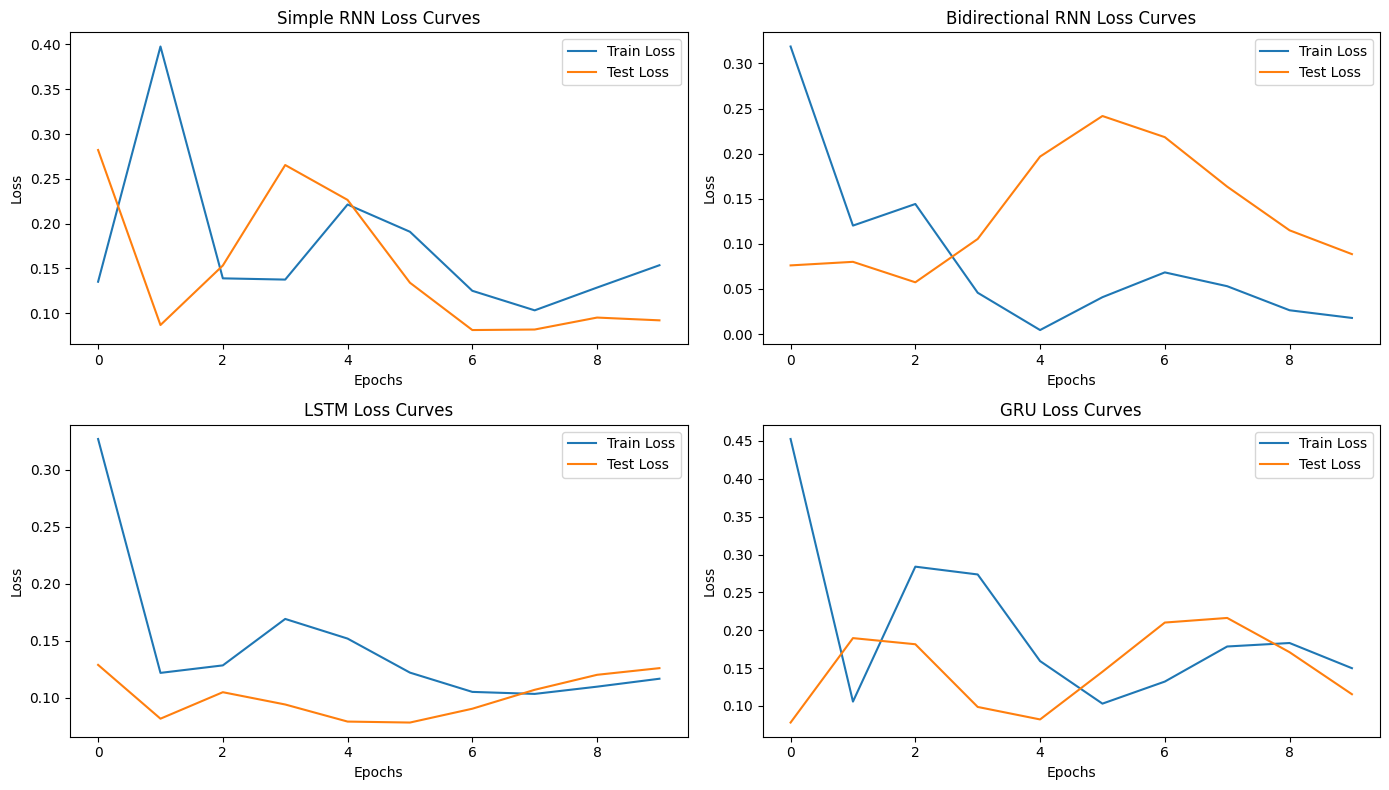

In [7]:
# Model evaluation and metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

def evaluate_model(model, test_loader):
    model.eval()
    predictions = []
    actuals = []

    with torch.no_grad():
        for texts, labels in test_loader:
            texts, labels = texts.to(device), labels.to(device)

            output = model(texts)

            predictions.extend(output.cpu().numpy())
            actuals.extend(labels.cpu().numpy())

    # Convert back to original scale
    predictions = scaler.inverse_transform(np.array(predictions))
    actuals = scaler.inverse_transform(np.array(actuals))

    # Calculate metrics
    mse = mean_squared_error(actuals, predictions)
    mae = mean_absolute_error(actuals, predictions)
    r2 = r2_score(actuals, predictions)

    return {
        "MSE": mse,
        "MAE": mae,
        "R2": r2
    }

# Evaluate each model
evaluation_results = {}

for name, result in results.items():
    model = result["model"]
    metrics = evaluate_model(model, test_loader)
    evaluation_results[name] = metrics

    print(f"Evaluation for {name}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")
    print("-" * 60)

# Plot loss curves
plt.figure(figsize=(14, 8))

for i, (name, result) in enumerate(results.items()):
    plt.subplot(2, 2, i+1)
    plt.plot(result["train_losses"], label="Train Loss")
    plt.plot(result["test_losses"], label="Test Loss")
    plt.title(f"{name} Loss Curves")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()

plt.tight_layout()
plt.show()

# Part2

In [8]:
!pip install transformers datasets

import torch
from transformers import GPT2LMHeadModel, GPT2Tokenizer, TextDataset, DataCollatorForLanguageModeling
from transformers import Trainer, TrainingArguments

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 32.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 19.5 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2024.12.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which

In [9]:
# Create a custom dataset for fine-tuning
import os

# Function to create a simple dataset
def create_custom_dataset(filename="custom_dataset.txt"):
    # Create a simple dataset with some text entries
    # You can replace this with your own dataset creation logic
    text_samples = [
        "مرحبا بك في عالم الذكاء الاصطناعي.",
        "تعلم الآلة هو مجال فرعي من الذكاء الاصطناعي.",
        "نماذج اللغة الكبيرة أحدثت ثورة في مجال معالجة اللغة الطبيعية.",
        "الشبكات العصبية العميقة قادرة على التعلم من البيانات.",
        "تستخدم خوارزميات التعلم العميق في العديد من التطبيقات.",
        # Add more sentences as needed
    ]

    # Write samples to a file
    with open(filename, 'w', encoding='utf-8') as f:
        for sample in text_samples:
            f.write(sample + "\n")

    return filename

# Create dataset file
dataset_file = create_custom_dataset()
print(f"Dataset created at: {dataset_file}")

Dataset created at: custom_dataset.txt


In [10]:
# Load pre-trained model and tokenizer
model_name = "gpt2"  # Can also use "gpt2-medium", "gpt2-large" or "gpt2-xl"
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
model = GPT2LMHeadModel.from_pretrained(model_name)

# Add padding token to GPT2 tokenizer
tokenizer.pad_token = tokenizer.eos_token

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

In [11]:
# Prepare dataset for fine-tuning
def load_dataset(train_path, tokenizer, block_size=128):
    dataset = TextDataset(
        tokenizer=tokenizer,
        file_path=train_path,
        block_size=block_size,
    )
    return dataset

# Load dataset
train_dataset = load_dataset(dataset_file, tokenizer)

# Data collator
data_collator = DataCollatorForLanguageModeling(
    tokenizer=tokenizer,
    mlm=False,
)

/usr/local/lib/python3.11/dist-packages/transformers/data/datasets/language_modeling.py:53: FutureWarning: This dataset will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/language-modeling/run_mlm.py
  warnings.warn(


In [12]:
# Set up training arguments
training_args = TrainingArguments(
    output_dir="./results",
    overwrite_output_dir=True,
    num_train_epochs=3,
    per_device_train_batch_size=4,
    save_steps=500,
    save_total_limit=2,
    prediction_loss_only=True,
)

# Initialize trainer
trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=data_collator,
    train_dataset=train_dataset,
)

# Train the model
trainer.train()

# Save the model
model_path = "./fine_tuned_gpt2"
model.save_pretrained(model_path)
tokenizer.save_pretrained(model_path)
print(f"Model saved to {model_path}")

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: azarkanzakariae (azarkanzakariae-faculty-of-science-technology-of-tangier) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


`loss_type=None` was set in the config but it is unrecognised.Using the default loss: `ForCausalLMLoss`.


Step,Training Loss


Model saved to ./fine_tuned_gpt2


In [13]:
# Generate text with the fine-tuned model
def generate_text(prompt, model, tokenizer, max_length=100):
    input_ids = tokenizer.encode(prompt, return_tensors="pt").to(device)

    # Generate text
    output = model.generate(
        input_ids,
        max_length=max_length,
        num_return_sequences=1,
        do_sample=True,
        top_p=0.95,
        top_k=50,
        temperature=0.7,
        no_repeat_ngram_size=2,
    )

    generated_text = tokenizer.decode(output[0], skip_special_tokens=True)
    return generated_text

# Load the fine-tuned model
fine_tuned_model = GPT2LMHeadModel.from_pretrained(model_path).to(device)
fine_tuned_tokenizer = GPT2Tokenizer.from_pretrained(model_path)

test_prompt = "مرحبا بك في"
generated_text = generate_text(test_prompt, fine_tuned_model, fine_tuned_tokenizer)
print(f"Prompt: {test_prompt}")
print(f"Generated text: {generated_text}")

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


Prompt: مرحبا بك في
Generated text: مرحبا بك في أغات الجراءية هربة المخاطة عليه العنبي. السوشة مذهاد القتطاب سباع الله إلى الاستيمة. ثفرة لم


In [14]:
# Evaluate the text generation
def evaluate_generation(model, tokenizer, prompts):
    results = []

    for prompt in prompts:
        generated = generate_text(prompt, model, tokenizer)
        results.append({
            "prompt": prompt,
            "generated": generated
        })

    return results

test_prompts = [
    "الذكاء الاصطناعي هو",
    "تعلم الآلة يساعدنا في",
    "اللغة العربية لها"
]

evaluation = evaluate_generation(fine_tuned_model, fine_tuned_tokenizer, test_prompts)

for result in evaluation:
    print(f"Prompt: {result['prompt']}")
    print(f"Generated: {result['generated']}")
    print("-" * 60)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Prompt: الذكاء الاصطناعي هو
Generated: الذكاء الاصطناعي هواح على الأخير في التاسة اللغة بالقالة قرحة لعليف الالبدثة واللاغ حدياث المتشآة، دجال ال
------------------------------------------------------------
Prompt: تعلم الآلة يساعدنا في
Generated: تعلم الآلة يساعدنا في السيمة الفراءةة بعالى اللغة.

والشبقة:
. رضع الباسة مطاصة، العائة وكث المعدةٌ عمد الر�
------------------------------------------------------------
Prompt: اللغة العربية لها
Generated: اللغة العربية لها فلم قال الصلى اللال. التاصداث الرسورة والإسل الكثة عليفة مرجة.

السطة هو يحقة، نعب الالعلبة

------------------------------------------------------------


In [15]:
import json

# Save evaluation results
with open("text_generation_results.json", "w", encoding="utf-8") as f:
    json.dump(evaluation, f, ensure_ascii=False, indent=2)

# Save a sample of the generated text
with open("sample_generated_texts.txt", "w", encoding="utf-8") as f:
    for result in evaluation:
        f.write(f"Prompt: {result['prompt']}\n")
        f.write(f"Generated: {result['generated']}\n")
        f.write("-" * 60 + "\n")


Lab 3 completed successfully!
